## 라이브러리 import & 데이터 불러오기

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_file = "./KOBIS_개봉일람_2023-03-23_2.csv"
df = pd.read_csv(data_file, encoding='utf-8',index_col = "순번")

## 생략 없이 출력시키는 코드 ( 필요시 주석 처리 )

In [2]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 200)
# col 생략 없이 출력
pd.set_option('display.max_columns', 200)

## 데이터 전처리

In [3]:
# 널값 확인
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19901,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19902,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# 빈값 확인

df.isnull().sum()

영화명            0
감독          1298
제작사        12618
수입사         8178
배급사           76
개봉일            2
영화유형           0
영화형태           1
국적             1
전국 스크린수        0
전국 매출액        44
전국 관객수         0
서울 매출액        50
서울 관객수         0
장르            71
등급             5
영화구분           0
dtype: int64

## 배급사 전처리 부분

In [5]:
# '( )' 안쪽의 글씨 (ex> (주), (유), (사) etc.,) 함께 삭제
df['배급사']=df.배급사.str.replace(r"\(.*\)","") 
df['배급사']=df.배급사.str.replace("㈜","")
df['배급사']=df.배급사.str.replace("주식회사","")

# (주)씨제이이엔엠 으로 통일
df['배급사']=df.배급사.str.replace("CJ ENM","(주)씨제이이엔엠")

# 롯데엔터테인먼트 로 통일
df['배급사']=df.배급사.str.replace("롯데쇼핑롯데엔터테인먼트","롯데엔터테인먼트")
df['배급사']=df.배급사.str.replace("롯데컬처웍스(주)롯데엔터테인먼트","롯데엔터테인먼트")
df['배급사']=df.배급사.str.replace("롯데쇼핑(주)롯데시네마","롯데엔터테인먼트")


# 월트디즈니스튜디오스코리아 로 통일
df['배급사']=df.배급사.str.replace("월트디즈니컴퍼니코리아 유한책임회사","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("소니픽쳐스릴리징월트디즈니스튜디오스코리아","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("브에나비스타인터내셔널코리아","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("소니픽쳐스엔터테인먼트코리아식회사극장배급지점","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("한국소니픽쳐스릴리징브에나비스타영화㈜","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("소니픽쳐스릴리징코리아","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("월트디즈니코리아","월트디즈니스튜디오스코리아")
df['배급사']=df.배급사.str.replace("월트디즈니컴퍼니코리아","월트디즈니스튜디오스코리아")

# 이십세기폭스코리아 로 통일
df['배급사']=df.배급사.str.replace("이십세기폭스필름코퍼레이션","이십세기폭스코리아")

# 이름 통일 (KBS 미디어)
df['배급사']=df.배급사.str.replace("케이비에스미디어","KBS 미디어")

# 이름 통일 (에스케이 텔레콤)
df['배급사']=df.배급사.str.replace("에스케이플래닛","에스케이텔레콤")

C:\Users\user\AppData\Local\Temp\ipykernel_27584\3368032737.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['배급사']=df.배급사.str.replace(r"\(.*\)","")
C:\Users\user\AppData\Local\Temp\ipykernel_27584\3368032737.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['배급사']=df.배급사.str.replace("롯데컬처웍스(주)롯데엔터테인먼트","롯데엔터테인먼트")
C:\Users\user\AppData\Local\Temp\ipykernel_27584\3368032737.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['배급사']=df.배급사.str.replace("롯데쇼핑(주)롯데시네마","롯데엔터테인먼트")


## 전처리 이어서...

In [6]:
# 제작사, 수입사는 결측치가 너무 많아, drop
# 나머지 결측치는 기타로 변경

df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

# 한개가 결측치가 나와서 기타로 치환
df['국적'].fillna('기타', inplace=True)

# 서울 매출액 결측치 제거(사용을 안하니깨문에 0으로 변경)
df['서울 매출액'].fillna(0, inplace=True)

# 남은 결측치 제거
for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)
for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)
for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)

In [7]:
# 최종확인

df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        0
영화유형       0
영화형태       0
국적         0
전국 스크린수    0
전국 매출액     0
전국 관객수     0
서울 매출액     0
서울 관객수     0
장르         0
등급         0
영화구분       0
dtype: int64

In [8]:
# 범주형 데이터 값 확인

category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19484
컬럼 [감독] UNIQUE : 7876
컬럼 [배급사] UNIQUE : 1109
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 18
컬럼 [영화구분] UNIQUE : 2


In [9]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [10]:
# 다수의 배급사 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [11]:
# 영화유형은 두개 뿐이라 제거

df.drop('영화유형', axis=1, inplace=True)

In [12]:
# 등급 데이터 전처리

for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가':
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854 entries, 1 to 19904
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19854 non-null  object
 1   감독       19854 non-null  object
 2   배급사      19854 non-null  object
 3   개봉일      19854 non-null  object
 4   영화형태     19854 non-null  object
 5   국적       19854 non-null  object
 6   전국 스크린수  19854 non-null  object
 7   전국 매출액   19854 non-null  object
 8   전국 관객수   19854 non-null  object
 9   서울 매출액   19854 non-null  object
 10  서울 관객수   19854 non-null  object
 11  장르       19854 non-null  object
 12  등급       19854 non-null  object
 13  영화구분     19854 non-null  object
dtypes: object(14)
memory usage: 2.8+ MB


In [14]:
# 전국 매출액, 스크린 수, 관객수를 확인을 위해 int형으로 변경

df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

df['전국 스크린수'] = df['전국 스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 스크린수'] = df['전국 스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')

In [15]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

# movie_resize = df[(df['전국 관객수'] > 10000)]
# movie_resize.info()

movie_resize2 = df[(df['전국 관객수'] > 1000) & (df['전국 스크린수'] > 50)& (df['전국 관객수'] < 11000000)]
movie_resize2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 25 to 7927
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4148 non-null   object
 1   감독       4148 non-null   object
 2   배급사      4148 non-null   object
 3   개봉일      4148 non-null   object
 4   영화형태     4148 non-null   object
 5   국적       4148 non-null   object
 6   전국 스크린수  4148 non-null   int64 
 7   전국 매출액   4148 non-null   int64 
 8   전국 관객수   4148 non-null   int64 
 9   서울 매출액   4148 non-null   object
 10  서울 관객수   4148 non-null   object
 11  장르       4148 non-null   object
 12  등급       4148 non-null   object
 13  영화구분     4148 non-null   object
dtypes: int64(3), object(11)
memory usage: 486.1+ KB


In [16]:
# 국적 데이터 변경
for idx, row in movie_resize2.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize2['국적'][idx] = '기타'

C:\Users\user\AppData\Local\Temp\ipykernel_27584\2495381115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['국적'][idx] = '기타'


In [17]:
# 값 내보내기
movie_resize2.to_csv('movie_resize2.csv',index=False, encoding="utf-8-sig")

In [18]:
# 값 확인

movie_resize2['국적'].value_counts()

미국     1527
한국     1269
일본      412
기타      411
영국      189
프랑스     164
중국      118
독일       58
Name: 국적, dtype: int64

In [19]:
# top200 만듬

col = ['순번','영화명','감독','배급사','개봉일']
movie_resize2.reset_index(drop=False,inplace=True)
movie_resize2[col][:200].to_csv('movie_resize_ranking.csv', encoding="utf-8-sig")

In [20]:
# top 200 불러오기

movie_resize_ranking = pd.read_csv('./movie_resize_ranking.csv',index_col='순번',encoding='UTF-8')
movie_resize_ranking.drop('Unnamed: 0', axis=1, inplace=True)
movie_resize_ranking

,영화명,감독,배급사,개봉일
순번,,,,
25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14
26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23
27,기생충,봉준호,씨제이이엔엠,2019-05-30
28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16
29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06
30,보헤미안 랩소디,브라이언 싱어,월트디즈니스튜디오스코리아,2018-10-31
31,검사외전,이일형,쇼박스,2016-02-03
32,엑시트,이상근,씨제이이엔엠,2019-07-31
33,관상,한재림,쇼박스,2013-09-11


## 다음 전처리 이어서...

In [21]:
movie_resize_ranking

,영화명,감독,배급사,개봉일
순번,,,,
25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14
26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23
27,기생충,봉준호,씨제이이엔엠,2019-05-30
28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16
29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06
30,보헤미안 랩소디,브라이언 싱어,월트디즈니스튜디오스코리아,2018-10-31
31,검사외전,이일형,쇼박스,2016-02-03
32,엑시트,이상근,씨제이이엔엠,2019-07-31
33,관상,한재림,쇼박스,2013-09-11


In [22]:
# 점수화를 위해 개봉일을 datetime 타입으로 변경

movie_resize_ranking['개봉일'] = movie_resize_ranking['개봉일'].astype('datetime64')

In [23]:
# 점수화행 만들기

import datetime

movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')

movie_final = movie_resize2.copy()
movie_final['감독_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['배급사_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['주연배우_흥행'] = [0 for _ in range(len(movie_resize2))]

C:\Users\user\AppData\Local\Temp\ipykernel_27584\742394046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')


In [24]:
# 순번을 쓰기 위해 인덱스 풀기

movie_resize_ranking.reset_index(drop=False,inplace=True)

In [25]:
# 점수 구하는 코드

for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['감독'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['감독'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '감독_흥행'] = score

In [26]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['배급사'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['배급사'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '배급사_흥행'] = score

In [27]:
# 값 확인
(movie_final['배급사_흥행'] == 0).value_counts()

True     2527
False    1621
Name: 배급사_흥행, dtype: int64

In [28]:
# 날짜 데이터를 datetime으로 변경

import datetime
movie_final['연도'] = movie_final['개봉일'].dt.year
movie_final['월'] = movie_final['개봉일'].dt.month

movie_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순번       4148 non-null   int64         
 1   영화명      4148 non-null   object        
 2   감독       4148 non-null   object        
 3   배급사      4148 non-null   object        
 4   개봉일      4148 non-null   datetime64[ns]
 5   영화형태     4148 non-null   object        
 6   국적       4148 non-null   object        
 7   전국 스크린수  4148 non-null   int64         
 8   전국 매출액   4148 non-null   int64         
 9   전국 관객수   4148 non-null   int64         
 10  서울 매출액   4148 non-null   object        
 11  서울 관객수   4148 non-null   object        
 12  장르       4148 non-null   object        
 13  등급       4148 non-null   object        
 14  영화구분     4148 non-null   object        
 15  감독_흥행    4148 non-null   int64         
 16  배급사_흥행   4148 non-null   int64         
 17  주연배우_흥행  4148 non-null   int64   

In [29]:
# 시즌 데이터 변경

season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

movie_final['계절'] = movie_final[['월']].apply(lambda x : x.map(season))

In [30]:
movie_final

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,"35,339,578,744","2,612,163",액션,12세관람가,일반영화,0,10,0,2022,12,겨울
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,"25,001,906,266","2,823,388",액션,12세관람가,일반영화,9,10,0,2015,4,봄
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,"24,128,560,195","2,790,209",드라마,15세관람가,일반영화,10,10,0,2019,5,봄
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,"25,847,243,500","3,003,446",애니메이션,전체관람가,일반영화,0,10,0,2014,1,겨울
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,"25,500,349,600","3,079,036",SF,12세관람가,일반영화,9,9,0,2014,11,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,7763,앙상블,정형석,,2020-11-05,장편,한국,52,10376610,1140,"6,412,540",678,드라마,12세관람가,독립/예술영화,0,0,0,2020,11,가을
4144,7781,퍼펙트 스틸,기타,팝엔터테인먼트,2021-10-28,장편,영국,66,10073100,1122,"5,621,200",604,범죄,15세관람가,일반영화,0,0,0,2021,10,가을
4145,7808,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,얼리버드픽쳐스,2021-03-24,장편,일본,60,8850500,1102,"3,937,000",489,애니메이션,전체관람가,일반영화,0,0,0,2021,3,봄
4146,7873,죽을 때까지,기타,제이앤씨미디어그룹,2021-09-09,장편,미국,53,10685640,1047,"5,301,470",491,스릴러,청소년관람불가,일반영화,0,0,0,2021,9,가을


In [31]:
movie_final.drop('서울 매출액', axis=1, inplace=True)
movie_final.drop('서울 관객수', axis=1, inplace=True)

In [32]:
movie_total_people = pd.read_csv('./movie_total_people.csv',index_col='연도',encoding='UTF-8')
movie_total_people

,개봉편수,상영편수,매출액,관객수
연도,,,,
2004,280,300,"440,728,906,206","69,254,626"
2005,306,415,"780,364,979,467","123,352,059"
2006,351,482,"892,442,138,000","144,256,035"
2007,393,611,"965,486,624,538","152,022,992"
2008,380,804,"961,453,297,251","147,428,639"
2009,362,714,"1,083,196,004,950","155,398,654"
2010,430,797,"1,157,254,738,250","147,759,214"
2011,442,943,"1,235,799,464,200","159,724,465"
2012,641,"1,231","1,455,140,354,435","194,890,587"


In [33]:
movie_total_people['관객수'] = movie_total_people['관객수'].str.replace(pat=r',', repl=r'', regex=True)
movie_total_people['관객수'] = movie_total_people['관객수'].astype('int64')

In [34]:
movie_final['총 관객수'] = [0 for _ in range(len(movie_final))]
movie_final

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절,총 관객수
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,0,10,0,2022,12,겨울,0
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,9,10,0,2015,4,봄,0
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,10,10,0,2019,5,봄,0
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,0,10,0,2014,1,겨울,0
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,9,9,0,2014,11,가을,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,7763,앙상블,정형석,,2020-11-05,장편,한국,52,10376610,1140,드라마,12세관람가,독립/예술영화,0,0,0,2020,11,가을,0
4144,7781,퍼펙트 스틸,기타,팝엔터테인먼트,2021-10-28,장편,영국,66,10073100,1122,범죄,15세관람가,일반영화,0,0,0,2021,10,가을,0
4145,7808,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,얼리버드픽쳐스,2021-03-24,장편,일본,60,8850500,1102,애니메이션,전체관람가,일반영화,0,0,0,2021,3,봄,0
4146,7873,죽을 때까지,기타,제이앤씨미디어그룹,2021-09-09,장편,미국,53,10685640,1047,스릴러,청소년관람불가,일반영화,0,0,0,2021,9,가을,0


In [35]:
for idx, row in movie_total_people.iterrows():
    movie_final['총 관객수'][movie_final['연도'] == idx] = row['관객수']

C:\Users\user\AppData\Local\Temp\ipykernel_27584\3192622733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['총 관객수'][movie_final['연도'] == idx] = row['관객수']


In [36]:
movie_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순번       4148 non-null   int64         
 1   영화명      4148 non-null   object        
 2   감독       4148 non-null   object        
 3   배급사      4148 non-null   object        
 4   개봉일      4148 non-null   datetime64[ns]
 5   영화형태     4148 non-null   object        
 6   국적       4148 non-null   object        
 7   전국 스크린수  4148 non-null   int64         
 8   전국 매출액   4148 non-null   int64         
 9   전국 관객수   4148 non-null   int64         
 10  장르       4148 non-null   object        
 11  등급       4148 non-null   object        
 12  영화구분     4148 non-null   object        
 13  감독_흥행    4148 non-null   int64         
 14  배급사_흥행   4148 non-null   int64         
 15  주연배우_흥행  4148 non-null   int64         
 16  연도       4148 non-null   int64         
 17  월        4148 non-null   int64   

In [37]:
movie_final['전국 관객수'] = movie_final['전국 관객수'].astype('int64')

In [38]:
movie_final.head(30)

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절,총 관객수
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,0,10,0,2022,12,겨울,112805094
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,9,10,0,2015,4,봄,217299523
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,10,10,0,2019,5,봄,226678777
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,0,10,0,2014,1,겨울,215068958
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,9,9,0,2014,11,가을,215068958
5,30,보헤미안 랩소디,브라이언 싱어,월트디즈니스튜디오스코리아,2018-10-31,장편,미국,936,86280975785,9948386,드라마,12세관람가,일반영화,7,10,0,2018,10,가을,216385269
6,31,검사외전,이일형,쇼박스,2016-02-03,장편,한국,1812,77252755264,9699092,범죄,15세관람가,일반영화,0,10,0,2016,2,겨울,217026182
7,32,엑시트,이상근,씨제이이엔엠,2019-07-31,장편,한국,1660,79232212162,9426051,코미디,12세관람가,일반영화,0,10,0,2019,7,여름,226678777
8,33,관상,한재림,쇼박스,2013-09-11,장편,한국,1190,66005451500,9134586,사극,15세관람가,일반영화,0,10,0,2013,9,가을,213351030
9,34,아이언맨 3,쉐인 블랙,월트디즈니스튜디오스코리아,2013-04-25,장편,미국,1381,70806191000,9001309,액션,12세관람가,일반영화,0,9,0,2013,4,봄,213351030


In [39]:
movie_final.groupby('연도')['전국 관객수'].mean()

연도
2007    2.120741e+06
2008    7.902444e+05
2009    6.890982e+05
2010    7.128649e+05
2011    7.941877e+05
2012    7.987963e+05
2013    8.038244e+05
2014    6.226255e+05
2015    6.288151e+05
2016    6.039809e+05
2017    5.311971e+05
2018    5.135625e+05
2019    5.140570e+05
2020    1.579168e+05
2021    1.933799e+05
2022    3.687577e+05
2023    2.545324e+05
Name: 전국 관객수, dtype: float64

In [40]:
total_max = dict(movie_final.groupby('연도')['전국 관객수'].max())
total_min = dict(movie_final.groupby('연도')['전국 관객수'].min())

total_mean = dict(movie_final.groupby('연도')['전국 관객수'].mean())
total_std = dict(movie_final.groupby('연도')['전국 관객수'].std())

In [41]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y')
    
    movie_final.loc[idx, '관객비율'] = (((movie_final.loc[idx,'전국 관객수'] - total_min[int(open)])/ (total_max[int(open)] - total_min[int(open)]))).round(2)
    print(movie_final.loc[idx,'전국 관객수'],total_min[int(open)],total_max[int(open)])

10779198 1346 10779198
10494499 2093 10494499
10313086 1712 10313086
10296101 3199 10296101
10273803 3199 10296101
9948386 1303 9948386
9699092 1570 9699092
9426051 1712 10313086
9134586 2153 9134586
9001309 2153 9134586
8914845 2153 9134586
8677249 1570 9699092
8656397 3199 10296101
8646758 3199 10296101
8487894 4555 8487894
8252669 1712 10313086
8245523 4989 8245523
8177446 1346 10779198
8020208 1712 10313086
7817446 1503 7817446
7784807 9753 7784807
7759473 2093 10494499
7575899 9753 7784807
7551990 1047 7551990
7505700 4555 8487894
7487545 1570 9699092
7466976 9753 7784807
7328820 9753 7784807
7264934 1346 10779198
7257973 1503 7817446
7231638 1503 7817446
7166199 2153 9134586
7150541 1570 9699092
7118592 1570 9699092
7074867 1652 7074867
7071763 2093 10494499
7049643 1570 9699092
6979319 1346 10779198
6965706 1570 9699092
6953800 2153 9134586
6878264 1570 9699092
6851297 1503 7817446
6686912 4989 8245523
6654837 1652 7074867
6592151 1503 7817446
6584915 1303 9948386
6396528 1652 7

C:\Users\user\AppData\Local\Temp\ipykernel_27584\1719360277.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  movie_final.loc[idx, '관객비율'] = (((movie_final.loc[idx,'전국 관객수'] - total_min[int(open)])/ (total_max[int(open)] - total_min[int(open)]))).round(2)


98336 1346 10779198
98231 1503 7817446
98161 2093 10494499
97883 2093 10494499
97849 1303 9948386
97787 4555 8487894
97777 1303 9948386
97580 1712 10313086
97555 1652 7074867
97398 1005 4750104
97079 1303 9948386
97017 1503 7817446
97005 1503 7817446
96683 10618 6282774
96495 1712 10313086
96410 10618 6282774
96305 1570 9699092
96137 4555 8487894
96079 1652 7074867
96077 9753 7784807
95983 1346 10779198
95542 1570 9699092
95415 1570 9699092
94993 4989 8245523
94920 4555 8487894
94790 4555 8487894
94767 1570 9699092
94750 1503 7817446
94652 1652 7074867
94281 1503 7817446
94266 1570 9699092
94243 1570 9699092
94179 1303 9948386
94151 1303 9948386
94119 1712 10313086
94030 1047 7551990
93691 1303 9948386
93656 1047 7551990
93504 1346 10779198
93336 9753 7784807
93311 1712 10313086
93239 2153 9134586
93191 4989 8245523
93116 1047 7551990
93005 1570 9699092
93000 1303 9948386
92729 1570 9699092
92713 1712 10313086
92598 2093 10494499
92505 9753 7784807
92404 1652 7074867
92369 1515 3638498

In [42]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y')
    
    movie_final.loc[idx, '관객비율'] = (((movie_final.loc[idx,'전국 관객수'] - total_mean[int(open)])/ (total_std[int(open)]))).round(2)
    print(movie_final.loc[idx, '관객비율'])

8.76
7.01
7.53
6.75
6.73
7.83
6.32
6.85
5.39
5.3
5.25
5.61
5.6
5.6
6.47
5.95
5.94
6.57
5.77
5.95
5.0
5.06
4.85
11.58
5.66
4.78
4.78
4.68
5.8
5.5
5.47
4.12
4.55
4.53
4.71
4.58
4.48
5.56
4.42
3.98
4.36
5.16
4.7
4.39
4.95
5.04
4.2
5.2
3.99
4.52
3.9
3.9
3.85
4.87
3.83
4.64
4.06
4.27
4.17
3.1
3.47
3.09
3.49
4.47
3.04
3.96
4.09
3.37
3.42
4.09
4.05
3.91
3.23
3.26
3.97
3.64
2.87
3.29
3.76
3.41
3.78
3.05
3.75
3.7
3.08
3.61
3.07
3.02
3.53
3.04
2.91
2.86
3.28
2.9
8.72
3.25
2.93
2.85
2.84
2.51
3.09
2.82
2.77
2.85
3.12
2.76
3.22
3.0
2.79
3.53
3.2
2.58
7.97
3.35
2.81
2.57
2.8
2.55
2.47
2.67
2.15
2.48
2.63
2.82
2.63
2.44
2.59
2.85
2.36
2.36
2.35
2.33
2.0
2.8
2.3
2.25
2.28
2.69
6.94
2.71
2.38
2.7
2.69
2.34
2.58
2.43
2.42
2.55
5.32
2.54
5.38
2.12
2.08
2.07
1.99
2.05
2.49
1.99
1.97
1.96
1.7
2.41
2.52
2.22
2.21
2.49
1.94
1.66
2.19
2.49
2.28
1.89
2.15
2.25
1.88
2.42
1.86
1.85
1.57
2.22
2.19
1.67
1.67
1.5
1.73
2.2
1.97
2.06
4.5
1.72
1.45
2.17
2.09
1.93
1.42
1.92
1.58
1.66
1.65
1.4
1.62
4.36
2.02
1.54
1.62


In [43]:
# nan 값 없애는 코드
movie_final[movie_final['관객비율']==np.inf] = 0

In [44]:
movie_final['관객비율']

0       8.76
1       7.01
2       7.53
3       6.75
4       6.73
        ... 
4143   -0.30
4144   -0.30
4145   -0.30
4146   -0.30
4147   -0.30
Name: 관객비율, Length: 4148, dtype: float64

In [45]:
movie_final['관객비율'] = (movie_final['전국 관객수'] / movie_final['총 관객수'])

# 라벨링 작업

In [46]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final['계절'])
movie_labels.head(3)

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절,총 관객수,관객비율
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14 00:00:00,2,2,2809,137325939643,10779198,16,0,1,0,10,0,2022,12,1,112805094,0.095556
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23 00:00:00,2,2,1843,88582586366,10494499,16,0,1,9,10,0,2015,4,2,217299523,0.048295
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30 00:00:00,2,7,1948,87459829095,10313086,6,1,1,10,10,0,2019,5,2,226678777,0.045496


In [47]:
movie_labels.columns

Index(['순번', '영화명', '감독', '배급사', '개봉일', '영화형태', '국적', '전국 스크린수', '전국 매출액',
       '전국 관객수', '장르', '등급', '영화구분', '감독_흥행', '배급사_흥행', '주연배우_흥행', '연도', '월',
       '계절', '총 관객수', '관객비율'],
      dtype='object')

In [48]:
# movie_final['관객비율']

In [49]:

# movie_final['관객비율'] = movie_final['관객비율'].astype('int64')

In [50]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

In [51]:
# 사용하지 않는 컬럼 제거
not_used = ['영화명', '감독', '배급사','영화형태','개봉일','영화구분','연도','월','주연배우_흥행','총 관객수']

movie_DL = movie_labels.drop(not_used, axis=1)

In [52]:
movie_DL

,순번,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,감독_흥행,배급사_흥행,계절,관객비율
0,25,2,2809,137325939643,10779198,16,0,0,10,1,0.095556
1,26,2,1843,88582586366,10494499,16,0,9,10,2,0.048295
2,27,7,1948,87459829095,10313086,6,1,10,10,2,0.045496
3,28,2,1010,82461504400,10296101,15,2,0,10,1,0.047873
4,29,2,1342,82274331200,10273803,0,0,9,9,0,0.047770
...,...,...,...,...,...,...,...,...,...,...,...
4143,7763,7,52,10376610,1140,6,0,0,0,0,0.000019
4144,7781,3,66,10073100,1122,10,1,0,0,0,0.000019
4145,7808,4,60,8850500,1102,15,2,0,0,2,0.000018
4146,7873,2,53,10685640,1047,14,3,0,0,0,0.000017


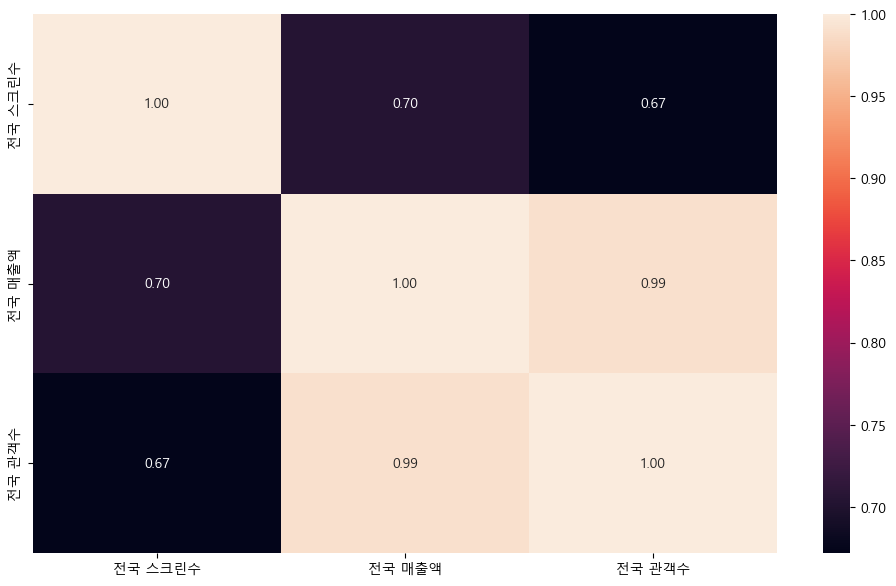

In [53]:
# 사용하는 수치형 데이터 히트맵
digital_cols2 = ['전국 스크린수', '전국 매출액', '전국 관객수']
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(12, 7))
sns.heatmap(movie_resize2[digital_cols2].corr(), annot=True, fmt='.2f')
plt.show()

In [54]:
# 입력 컬럼 확인(값을 하나 빼야한다 => 전국 관객수로 쓰려고)
movie_DL.columns

Index(['순번', '국적', '전국 스크린수', '전국 매출액', '전국 관객수', '장르', '등급', '감독_흥행',
       '배급사_흥행', '계절', '관객비율'],
      dtype='object')

## 학습 준비 단계

In [55]:
# 독립 변수와 종속 변수 나눔

독립 = movie_DL[['국적', '장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '관객비율', '전국 스크린수', '전국 매출액']]
종속 = movie_DL[['전국 관객수']] 

In [56]:
len(독립.columns)

9

In [57]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## 학습, 테스트 데이터 나눔

In [58]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.2,random_state=42)

## 컴파일 단계

In [59]:
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
minmax_scaler = MinMaxScaler()

# 분포 저장
minmax_scaler.fit(train_input)

# 스케일링
train_scaled = minmax_scaler.transform(train_input)
test_scaled = minmax_scaler.transform(test_input)

In [60]:
train_scaled

array([[1.00000000e+00, 7.50000000e-01, 6.66666667e-01, ...,
        5.43944720e-03, 2.03408267e-01, 1.07585742e-02],
       [5.71428571e-01, 7.50000000e-01, 6.66666667e-01, ...,
        3.44057679e-03, 1.02610587e-01, 6.53242756e-03],
       [2.85714286e-01, 7.50000000e-01, 6.66666667e-01, ...,
        4.71339944e-03, 6.38143582e-02, 7.19479400e-03],
       ...,
       [0.00000000e+00, 8.00000000e-01, 0.00000000e+00, ...,
        4.31255063e-04, 3.22697607e-02, 8.46042590e-04],
       [1.00000000e+00, 7.50000000e-01, 6.66666667e-01, ...,
        1.24674698e-04, 1.45032632e-03, 2.14942259e-04],
       [2.85714286e-01, 3.00000000e-01, 6.66666667e-01, ...,
        2.52708919e-02, 8.95576505e-02, 3.00286432e-02]])

In [75]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[9])

H = tf.keras.layers.Dense(28)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)


H = tf.keras.layers.Dense(28)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,Y)
sgd = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=sgd,loss='mae')

In [81]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_3 (Dense)             (None, 28)                280       
                                                                 
 batch_normalization_2 (Batc  (None, 28)               112       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 28)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                812       
                                                                 
 batch_normalization_3 (Batc  (None, 28)               112       
 hNormalization)                                           

## 훈련

In [76]:
# 훈련

model.fit(train_input,train_target,batch_size=128,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 179915.9375 - val_loss: 648569.3750
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 179910.7188 - val_loss: 648564.0000
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 179899.7188 - val_loss: 648550.0625
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 179880.9844 - val_loss: 648535.6875
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 179858.5000 - val_loss: 648497.8750
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 179838.0156 - val_loss: 648461.1875
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 179825.4688 - val_loss: 648429.1875
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 179813.7031 - val_loss: 648395.6250
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 179800.9844 - val_loss: 648366.6250
Epoch 10/100
26/26 

In [77]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 69ms/step


array([[18616.715],
       [14945.682],
       [15531.035],
       [10299.586],
       [ 9288.152]], dtype=float32)

In [78]:
train_target[:5]

,전국 관객수,pred,오차율
1451,193484,18096.0,90.647289
1718,119197,14026.0,88.232925
1550,157972,14683.0,90.705315
2698,27010,8699.0,67.793410
3818,5045,7508.0,48.820614


In [65]:
movie_final

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절,총 관객수,관객비율
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14 00:00:00,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,0,10,0,2022,12,겨울,112805094,0.095556
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23 00:00:00,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,9,10,0,2015,4,봄,217299523,0.048295
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30 00:00:00,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,10,10,0,2019,5,봄,226678777,0.045496
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16 00:00:00,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,0,10,0,2014,1,겨울,215068958,0.047873
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06 00:00:00,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,9,9,0,2014,11,가을,215068958,0.047770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,7763,앙상블,정형석,,2020-11-05 00:00:00,장편,한국,52,10376610,1140,드라마,12세관람가,독립/예술영화,0,0,0,2020,11,가을,59523967,0.000019
4144,7781,퍼펙트 스틸,기타,팝엔터테인먼트,2021-10-28 00:00:00,장편,영국,66,10073100,1122,범죄,15세관람가,일반영화,0,0,0,2021,10,가을,60531087,0.000019
4145,7808,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,얼리버드픽쳐스,2021-03-24 00:00:00,장편,일본,60,8850500,1102,애니메이션,전체관람가,일반영화,0,0,0,2021,3,봄,60531087,0.000018
4146,7873,죽을 때까지,기타,제이앤씨미디어그룹,2021-09-09 00:00:00,장편,미국,53,10685640,1047,스릴러,청소년관람불가,일반영화,0,0,0,2021,9,가을,60531087,0.000017


In [80]:
# 확인용도
pred = model.predict(train_input).round(0)
# 여기랑 비슷한지 보기
train_target['pred'] = pred
train_target['오차율'] = (abs((train_target['전국 관객수'] - train_target['pred'])) / train_target['전국 관객수'])*100
a=len(train_target.loc[train_target['오차율'] > 20])
print(a)
print("전국관객수", train_target['전국 관객수'])
print("pred", train_target['pred'])
len(train_target)

104/104 [==============================] - 0s 1ms/step
3075
전국관객수 1451     193484
1718     119197
1550     157972
2698      27010
3818       5045
         ...   
3444       9826
466     1462280
3092      15890
3772       5473
860      582698
Name: 전국 관객수, Length: 3318, dtype: int64
pred 1451    18617.0
1718    14946.0
1550    15531.0
2698    10300.0
3818     9288.0
         ...   
3444     9453.0
466     29762.0
3092     9819.0
3772     9242.0
860     31768.0
Name: pred, Length: 3318, dtype: float32


3318

In [67]:
train_target['오차율']

1451    90.647289
1718    88.232925
1550    90.705315
2698    67.793410
3818    48.820614
          ...    
3444    21.605943
466     97.835162
3092    48.810573
3772    36.195871
860     94.484107
Name: 오차율, Length: 3318, dtype: float64

In [68]:
# pip install -U pandas-profiling

In [69]:
import pandas as pd
import pandas_profiling

data = pd.read_csv('KOBIS_개봉일람_2023-03-23_2.csv',encoding='UTF-8')
pr=data.profile_report()

C:\Users\user\AppData\Local\Temp\ipykernel_27584\1738363530.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [70]:
# pr=data.profile_report()

In [71]:
# data.profile_report()

In [72]:
# pip install ipywidgets

In [73]:
# pr=movie_final.profile_report()

In [74]:
# pr